# CSc I6716 Fall 2020 -Assignment 1
Computer Science – The City College of New York
Computer Vision
Assignment 1 ( Deadline: 10/04 Sunday) before midnight)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

%matplotlib inline

In [5]:
InputImage = 'IDPicture.png'

# 1. Writing Assignments (10×4 = 40 points)
(1). How does an image change (e.g., objects’ sizes in the image, field of view, etc.) when you change the zoom factors of your pinhole camera (i.e., the focal length of a pinhole camera is changed)?

(2). Give an intuitive explanation why a pinhole camera has an infinite depth of field, i.e., the images of objects are always sharp regardless their distances from the camera.

(3). In the thin lens model, 1/o + 1/i = 1/f, there are three variables, the focal length f, the object distance o and the image distance i (please refer to the Slides of the Image Formation lecture). If we define Z = o-f, and z = i-f, please write a few words to describe the physical meanings of Z and z, and then prove that Z*z = f*f given 1/o + 1/i = 1/f.

(4). Prove that, in the pinhole camera model, three collinear points in the world (i.e., they lie on a line  in 3D space) are imaged into three collinear points on the image plane. You may either use geometric reasoning (with line drawings) or algebra deduction (using equations).

### (1) The field of view on the image plane gets bigger when you move away from the pinhole and smaller when you move closer to the pinhole. Because the angle from the optical axis to any ray is measured from the focal length, as the focal length shortens, the field of view decreases in circumference.
-------------------------

### (2) A pinhole camera model has an infinite depth of field because there is a single light ray from the object plane to the image plane. This idealized model has has no blurring.
_______________________

### (3) z is the distance from the focal point to the object plane; Z is the distance from the focal point to the image plane.
### For z = i-f, Z = o-f, and 1/o + 1/i = 1/f: 
### -> (A) Zz = (i-f)(o-f) = (f-o)(f-i) = f^2 - f(o+i) + (o)(i)
### -> (B) 1/o + 1/i = (o + i)/(io)
### -> (A & B) Zz = f^2 - (i+o) [(o+i)/(io)]^-1 + (o)(i) = f^2 -(io) +(o)(i) = f^2
### The product of the image to the focal plane and the object to the focal plane is the focal plane squared.

--------------


### (4) [In linear algebra, if points are collinear, their determinant is zero](http://www.sci.utah.edu/~gerig/CS6320-S2013/Materials/Assignment1-sol.pdf).

### In the projective space write the fundamental equations x = fX/Z_c, y = fY/Z_c. Point p_i = (f•X_i/ Z_c, f•Y/Z_c, f) for i = 1, 2, 3. For d = x, y write d_3 = k_d * (d_2) + (1- k_d) * d_1. Since the third component is a linear combination of the first two components, when you substitute this and take a determinant of these three points you get 0. The three points are collinear in the image plane. ૿


# 2. Programming  Assignments 
(Matlab preferred – here is a quick matlab tutorial.  You may use C++, Java or Python if you like, but you may need to show the running of your program during my office hours when I ask you. If you don’t have a Matlab license, CUNY faculty and students will be able to download a standalone Matlab version by creating an account using your CCNY email account at this website. ) (15×4 = 60 points)

Image formation.  In this small project, you are going to read, manipulate and write image data. The purpose of the project is to make you familiar with the basic digital image formations. Your program should do the following things:

1. Read in a color image C1(x,y) = (R(x,y), G(x,y), B(x,y)) in Windows BMP format, and display it.


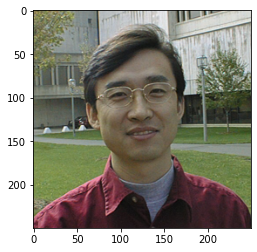

In [6]:
C1 = plt.imread(InputImage)
plt.imshow(C1)

2. Display the images of the three color components, R(x,y), G(x,y) and B(x,y), separately. You should display three black-white-like images.

4
250
250


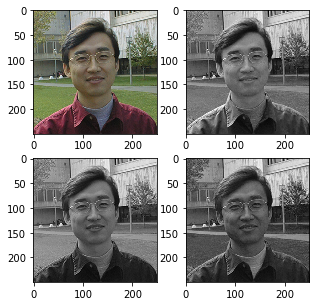

In [7]:
C = [ C1[:,:,i] for i in range(4) ] #C is just the color images wheras C1 includes the Black and White channel.
print(len(C))
print(len(C[0]))
print(len(C[0][0]))

R,G,B,A= C[0], C[1], C[2], C[3]



disimg = [[C1, R],[G,B]]
fig, axs = plt.subplots(2,2, figsize=(5,5))
for i in range(2):
    for j in range(2):
        axs[i,j].imshow(disimg[i][j], cmap='gray',  interpolation='nearest')

plt.show()

In [8]:
Ccopy = np.copy(C1)
Ccopy.shape

(250, 250, 4)

3. Generate an intensity image I(x,y) and display it. You should use the equation I = 0.299R + 0.587G + 0.114B (the NTSC standard for luminance) and tell us what are the differences between the intensity image thus generated from the one generated using a simple average of the R, G and B components. Please use an algorithm to show the differences instead by just observing the images by your eyes.

In [9]:
def intensity(R, G, B, A):
    I = np.stack( (0.299*R,0.587*G, 0.114*B, A), axis=-1 )
#     m = len(R)
#     n = len(R[0])
#     I = I.reshape(m,n,4)
    return I#.reshape(250,250,4)

def avgIntensity(R, G, B, A):
    avgI = np.stack( (R,G, B, 3*A), axis=-1 )/3 #Black and White channel stays the same
    return avgI

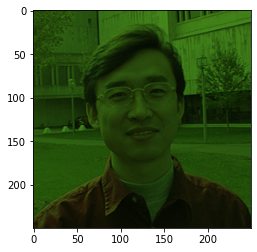

In [10]:
a = intensity(np.copy(R),np.copy(G),np.copy(B),np.copy(A))
plt.imshow( a )

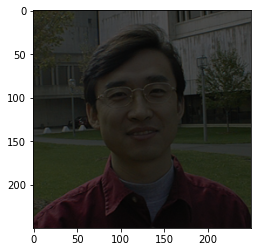

In [11]:
b = avgIntensity(np.copy(R),np.copy(G),np.copy(B),np.copy(A))
plt.imshow( b )

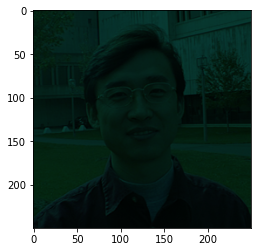

In [12]:
diff = [ abs(np.copy(a)[:,:,i]-np.copy(b)[:,:,i]) for i in range(4) ]
e, f, g, h = diff
diff2 = np.stack((e,f,g), axis= -1)
plt.imshow(diff2)

### We can see from the equation and observe from the image that the main difference is in the blue-green channels. The difference looks like a holographic (glossy) playing card. From the equations we can see that the difference will result in a bluish green: 

$$(0.333-.299)R + (0.333-0.587)G +(0.333-0.114)B = 0.004 \mathbf{R} + 0.254 \mathbf{G} + 0.219 \mathbf{B}$$

## The Green is the brightest

In [13]:
print(diff2)

[[[0.02100392 0.14026277 0.07483137]
  [0.01736863 0.1143987  0.05762876]
  [0.01884967 0.12733074 0.06967059]
  ...
  [0.02975556 0.21984443 0.184068  ]
  [0.02962092 0.21984443 0.18750851]
  [0.029217   0.21785489 0.18578824]]

 [[0.02261961 0.15418957 0.09375425]
  [0.02019608 0.13628368 0.07999216]
  [0.01804183 0.12136211 0.06106928]
  ...
  [0.02989021 0.22083923 0.18664837]
  [0.0294863  0.21984443 0.18750851]
  [0.0294863  0.21984443 0.18750851]]

 [[0.01938823 0.1323046  0.0868732 ]
  [0.02046536 0.13827322 0.09375425]
  [0.01804183 0.11638825 0.07053072]
  ...
  [0.029217   0.21686015 0.18320785]
  [0.02935165 0.21884969 0.18664837]
  [0.02894774 0.21686015 0.18492812]]

 ...

 [[0.02086928 0.07460786 0.08515295]
  [0.02046536 0.07062877 0.08171242]
  [0.01696472 0.05371765 0.06278954]
  ...
  [0.00592418 0.02884837 0.02408366]
  [0.00538562 0.02884837 0.02322353]
  [0.00457778 0.02387451 0.01806274]]

 [[0.02288888 0.09649281 0.09289412]
  [0.01871502 0.05570719 0.0670902 ]


4. The original intensity image should have 256 gray levels.  Please uniformly quantize this image into K levels ( with K=4, 16, 32, 64).  As an example,  when K=2,  pixels whose values are below 128 are turned to 0,  otherwise to 255.  Display the four quantized images with four different K levels,  and tell us how the images still look like or different from the original ones, and where you cannot see any differences.

In [14]:
def quantize(k,greyImage):
    zeroArray = np.zeros((1,k))
    quantiles = np.copy(zeroArray)
    'initialize a numpy array'
    quantImage = np.copy(greyImage) 
    #print('size of quantImage: ',quantImage.shape)
    
    for i in range(k):
        quantiles[0,i]=(i/k)
    for i,j in itertools.product(range(len(greyImage)), range(len(greyImage[0]))):
        'Get the difference from the quantiles'
        numDiff = abs(quantiles[0] - greyImage[i,j]) 
        'obtain the minimum difference'
        minDiff = min(numDiff) 
#         print('quantiles: ', quantiles)
#         print('numDiff, minDiff :', numDiff, minDiff)
        'use index of minimum difference; the first occurence'
        ind = np.where(numDiff == minDiff)[0] [0]
        
#         print('ind, i, j :',ind,i, j)
        'quantize rational'
        quantImage[i,j] = quantiles[0][ind]   
    return quantImage

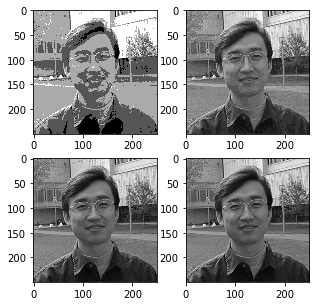

In [15]:
fig, axs = plt.subplots(2,2, figsize=(5,5))
ind = list( itertools.product(range(2),range(2)) )
bit = [4, 16, 32, 64]
RGB = 0.299*R + 0.587*G + 0.114*B
images = []
for k in bit:
    img = quantize(k,RGB)
    images.append(img)# prevents code from duplicating last image in all subplots
    axs[ ind[bit.index(k)] ].imshow(images[bit.index(k)], cmap='gray',  interpolation='nearest')
    #plt.imshow(img)

In [16]:
RGB = 0.299*R + 0.587*G + 0.114*B

In [17]:
RGB_64 = np.copy(quantize(64,RGB))
RGB_32 = np.copy(quantize(32,RGB))
RGB_16 = np.copy(quantize(16,RGB))
RGB_4 = np.copy(quantize(4,RGB))

In [18]:
RGB_4 == RGB_64

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [19]:
RGB_32 == RGB_64

array([[False, False,  True, ..., False, False, False],
       [False,  True,  True, ...,  True, False, False],
       [False, False,  True, ...,  True, False,  True],
       ...,
       [ True, False, False, ...,  True,  True, False],
       [ True, False, False, ..., False,  True,  True],
       [False, False, False, ...,  True, False,  True]])

### The image granular at low bit. By 32bit the images smoothens out and looks very similar to 64bit.

5. Quantize  the original three-band color image C1(x,y) into K level color images CK(x,y)= (R'(x,y), G'(x,y), B'(x,y)) (with uniform intervals) , and display them. You may choose K=2 and 4 (for each band).  Do they have any advantages in viewing and/or in computer processing (e.g. transmission or segmentation)?

In [20]:
R2 = quantize(2,np.copy(R))
G2 = quantize(2,np.copy(G))
B2 = quantize(2,np.copy(B))
R4 = quantize(4,np.copy(R))
G4 = quantize(4,np.copy(G))
B4 = quantize(4,np.copy(B))

fillz = np.zeros((250,250))

Rplot2 = np.stack(  ( R2, fillz, fillz ), axis=-1  )
Gplot2 = np.stack(  ( fillz, G2, fillz ), axis=-1  )
Bplot2 = np.stack(  ( fillz, fillz, B2 ), axis=-1  )
Rplot4 = np.stack(  ( R4, fillz, fillz ), axis=-1  )
Gplot4 = np.stack(  ( fillz, G4, fillz ), axis=-1  )
Bplot4 = np.stack(  ( fillz, fillz, B4 ), axis=-1  )
RGB2 = np.stack(  ( R2, G2, B2), axis=-1  )
RGB4 = np.stack(  ( R4, G4, B4), axis=-1  )

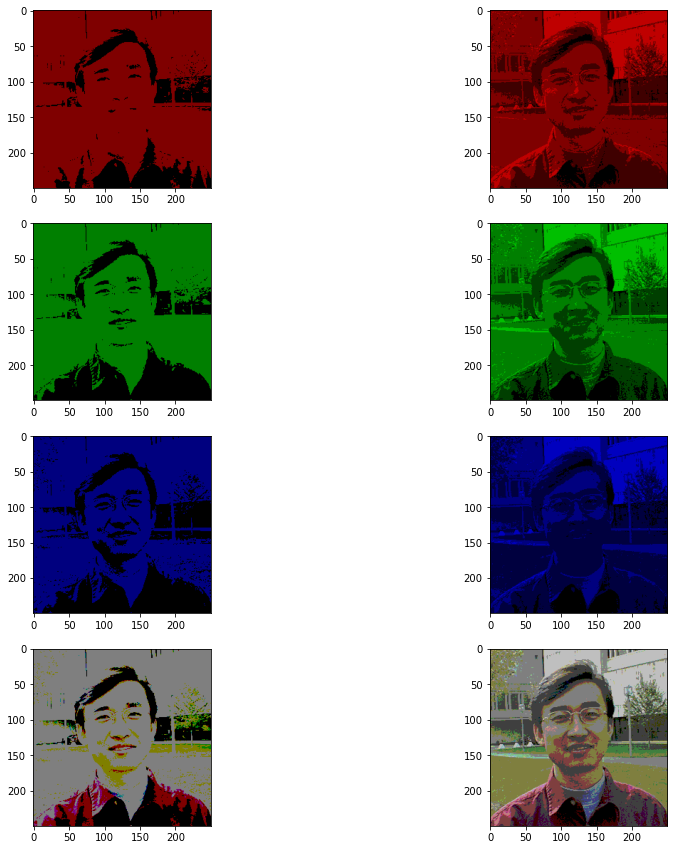

In [21]:
fig, axs = plt.subplots(4,2, figsize=(15,15))

arr = [[Rplot2,Rplot4],[Gplot2,Gplot4],[Bplot2,Bplot4],[RGB2,RGB4]]

iters = list( itertools.product(range(4),range(2)) )

for i, j in iters:
    axs[i][j].imshow(arr[i][j])
    #plt.imshow(img)
    

### For these low k values you see a stark contrast. It closer to the white zone and granular. We see that as you increase k, the image quickly smoothens out to make it more interpretable to the human eye. For these low k values it is advantageous for computer processing in that it is computationally efficient to transmit fewer distriubution of values and segmentation for clustering  a range of values for analysis.

6. Quantize  the original three-band color image C1(x,y) into a color image CL(x,y)= (R'(x,y), G'(x,y), B'(x,y)) (with a logarithmic function) , and display it. You may choose  a function  I’ =C ln (I+1) ( for each band), where I is the original value (0-255) , I’ is the quantized value,  and C is a constant to scale I’  into (0-255), and ln is the natural logarithmic function.  Please describe how you find the best C value so for an input in the range of 0-255, the output range is still 0 – 255. Note that when I = 0, I’ = 0 too.

In [22]:
c = 1/np.log(255+1)

R2log = quantize(255,c*np.copy(np.log(R+1)))
G2log = quantize(255,c*np.copy(np.log(G+1)))
B2log = quantize(255,c*np.copy(np.log(B+1)))


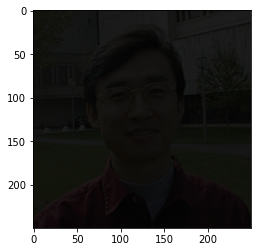

In [23]:
RGBlog = np.stack((R2log,G2log,B2log), axis=-1)
plt.imshow(RGBlog)


### We have tinting/ dimming behavior like we did in the contrast yet the image is very clear! The advantage of using the log plot is that the higher values are saturated in the image while the lower numbers drop off in increasing rate. This is a numeric efficient way of optimizing the original image for both the viewing and image processing. The value of the constant C is ideally 255/ln(255+1) on a continuum. In the algorithm, we discretize from 0 to 255 to simulate the 256 bit quantization and we divide the array by 1/ln(255+1).  The Ith color + 1 is a trick to adjust for any values in the array that are zero, because by definition we cannot take the natural log of zero. The trick has negligible effect to all the other values on a logarithmic scale, which is a benefit. The range of C is from 0 to ~46.